In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
mean_1 = [0.0, 0.0]
mean_2 = [2.5, 2.5]
cov_1 = [[0.9, 0.4], [0.3, 0.7]]
cov_2 = [[1.0, 0.1], [0.5, 0.6]]

d1 = np.random.multivariate_normal(mean_1, cov_1, 500)
d2 = np.random.multivariate_normal(mean_2, cov_2, 500)

print d1.shape, d2.shape

(500L, 2L) (500L, 2L)


In [3]:
d = np.zeros((d1.shape[0] + d2.shape[0], d1.shape[1]+1))
d[:d1.shape[0], :2] = d1
d[d1.shape[0]:, :2] = d2
d[d1.shape[0]:, 2] = 1
print d.shape
np.random.shuffle(d)
print d[150:160, 2]

(1000L, 3L)
[ 1.  0.  0.  0.  1.  0.  1.  0.  1.  0.]


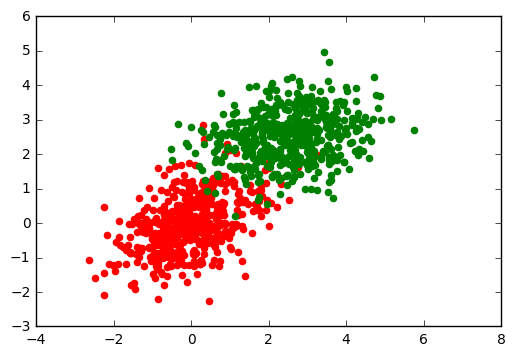

In [20]:
plt.figure(0)
plt.scatter(d1[:, 0], d1[:, 1], color='red')
plt.scatter(d2[:, 0], d2[:, 1], color='green')
plt.show()

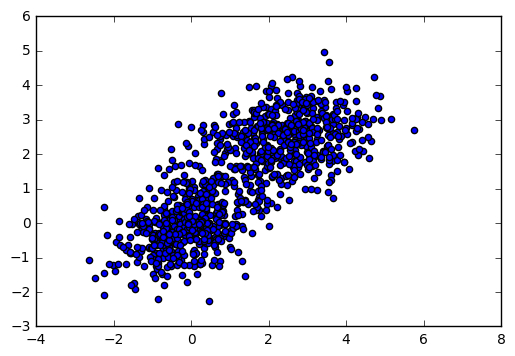

In [21]:
plt.figure(0)
plt.scatter(d[:, 0], d[:, 1])
plt.show()

In [55]:
split = int(0.8*d.shape[0])
X_train = d[:split, :2]
X_test = d[split:, :2]
y_train = d[:split, 2]
y_test = d[split:, 2]

print X_train.shape, X_test.shape

print y_train.shape, y_test.shape

cluster_centers = np.array([[0, -1], [100, 100]])

(800, 2) (200, 2)
(800,) (200,)


In [56]:
km = KMeans(n_clusters=2, init=cluster_centers)
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True,
    init=array([[  0,  -1],
       [100, 100]]), max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
pred = km.predict(X_train)

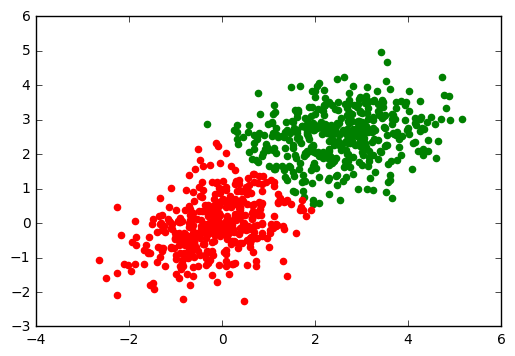

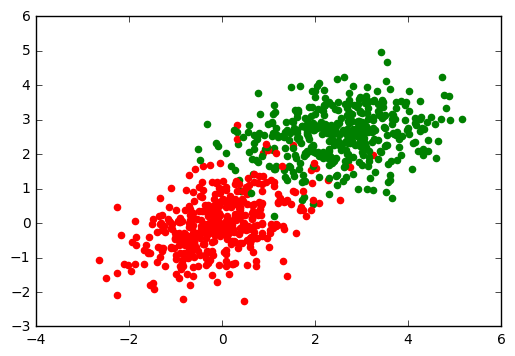

In [58]:
plt.figure(0)
for ix in range(pred.shape[0]):
    if pred[ix] == 0:
        plt.scatter(X_train[ix, 0], X_train[ix, 1], color='red')
    elif pred[ix]==1:
        plt.scatter(X_train[ix, 0], X_train[ix, 1], color='green')
    elif pred[ix] == 2:
        plt.scatter(X_train[ix, 0], X_train[ix, 1], color='blue')
    else:
        plt.scatter(X_train[ix, 0], X_train[ix, 1], color='black')

plt.figure(1)
for ix in range(pred.shape[0]):
    if y_train[ix] == 0:
        plt.scatter(X_train[ix, 0], X_train[ix, 1], color='red')
    else:
        plt.scatter(X_train[ix, 0], X_train[ix, 1], color='green')

        
plt.show()

In [59]:
print km.cluster_centers_
print km.inertia_

[[-0.15812265 -0.0496749 ]
 [ 2.51858816  2.54903212]]
1153.40714834
